In [157]:
import tensorflow as tf
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import math

In [158]:
start = dt.datetime(2007,1,1) # 시작 데이터 
end = dt.date.today()

s =web.YahooDailyReader('000660.KS', start,end,adjust_price=True).read()  #adjust_price 주가수정비율을 바탕으로 수정주가로 변환을 해준다 

In [159]:
s.tail(10)
print(s.head())

                    High           Low          Open         Close     Volume  \
Date                                                                            
2007-01-02  30076.150962  29395.332631  29555.525179  29996.054688  4438841.0   
2007-01-03  30196.293723  29595.571699  30076.149318  29675.667969  3625448.0   
2007-01-04  30076.150019  29515.476118  29715.716797  29715.716797  4410444.0   
2007-01-05  30076.150962  29155.043808  29956.006550  29996.054688  5912841.0   
2007-01-08  29915.957803  29235.139486  29795.813394  29395.332031  3436188.0   

            Adj_Ratio  
Date                   
2007-01-02   0.800963  
2007-01-03   0.800963  
2007-01-04   0.800963  
2007-01-05   0.800963  
2007-01-08   0.800963  


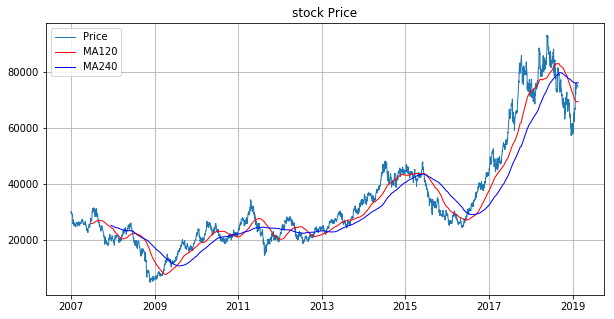

,High,Low,Open,Close,Volume,Adj_Ratio,sma120,sma240
Date,,,,,,,,
2007-01-02,30076.150962,29395.332631,29555.525179,29996.054688,4438841.0,0.800963,NaN,NaN
2007-01-03,30196.293723,29595.571699,30076.149318,29675.667969,3625448.0,0.800963,NaN,NaN
2007-01-04,30076.150019,29515.476118,29715.716797,29715.716797,4410444.0,0.800963,NaN,NaN
2007-01-05,30076.150962,29155.043808,29956.006550,29996.054688,5912841.0,0.800963,NaN,NaN
2007-01-08,29915.957803,29235.139486,29795.813394,29395.332031,3436188.0,0.800963,NaN,NaN
2007-01-09,29715.716421,29235.138797,29435.379474,29355.283203,2737071.0,0.800963,NaN,NaN
2007-01-10,29715.714309,28914.751659,29635.618044,29235.136719,4068429.0,0.800963,NaN,NaN
2007-01-11,29595.577019,28914.758603,29515.480735,29074.951172,5255318.0,0.800963,NaN,NaN
2007-01-12,29275.191299,28514.276614,29195.095016,29155.046875,5912235.0,0.800963,NaN,NaN


In [160]:
s['sma120']= s['Close'].rolling(window=120).mean() # 이동평균 구하는 함수 
s['sma240']= s['Close'].rolling(window=240).mean()
#s['MVol'] = pd.rolling_std(s['Close'],window=60)*np.sqrt(252)


plt.figure(1, figsize=(10,5))
plt.plot(s['Close'], linewidth=1,label="Price")
plt.plot(s['sma120'], linewidth=1, color='red',label='MA120')
plt.plot(s['sma240'], linewidth=1, color='blue',label='MA240')
plt.title("stock Price")
plt.grid()
plt.legend()
plt.show()
s

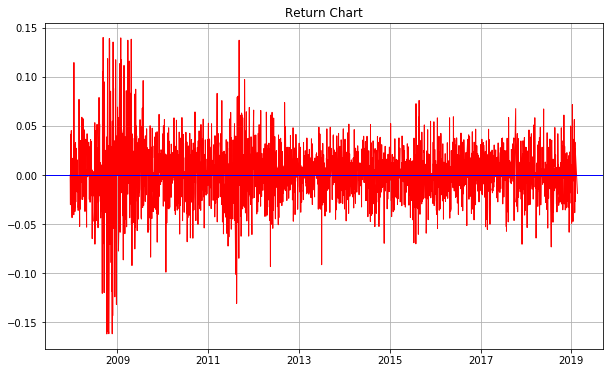

,High,Low,Open,Close,Volume,Adj_Ratio,sma120,sma240,Rtn,MRtn,MVol
Date,,,,,,,,,,,
2007-12-18,20344.453001,19703.682828,20104.164186,20224.308594,3691800.0,0.800963,24485.097005,25231.160409,0.000000,-0.002956,0.491793
2007-12-20,20384.502523,19503.443475,20344.454385,19623.587891,2833831.0,0.800963,24421.353727,25187.941797,-0.030153,-0.002724,0.487631
2007-12-21,19943.971842,18822.624027,19863.875569,19783.779297,3196468.0,0.800963,24362.616471,25146.725594,0.008130,-0.002789,0.487189
2007-12-24,20624.789062,19863.874515,19863.874515,20624.789062,4274037.0,0.800963,24308.217725,25108.846729,0.041631,-0.003066,0.479449
2007-12-26,21265.560509,20584.742188,20825.031007,20584.742188,2484200.0,0.800963,24257.156348,25069.632926,-0.001944,-0.003285,0.478529
2007-12-27,22200.045343,21081.759476,21413.103437,21537.357422,2801760.0,0.828360,24213.699691,25036.891366,0.045239,-0.002425,0.488687
2007-12-28,21951.537399,21371.685468,21413.103463,21495.939453,1933030.0,0.828360,24169.230436,25004.144100,-0.001925,-0.002403,0.488685
2008-01-02,21620.191996,20543.324195,21537.356011,20584.742188,3440780.0,0.828360,24107.489535,24968.100789,-0.043314,-0.002411,0.488854
2008-01-03,20584.740334,19963.470505,20211.978436,20377.650391,2770877.0,0.828360,24037.681934,24931.862036,-0.010111,-0.002410,0.488851


In [161]:
# 수익률 차트

s['Rtn']= np.log(s['Close'])-np.log(s['Close'].shift(1)) # 연속수익률을 쓰면 산술평균수익률을 쓸 수 있음 
# 이산 수익률은 산술평균수익률이 오차가 생김 
# log 오늘데이터 - log 어제데이터 

s['MRtn']= s['Rtn'].rolling(window=60).mean() #수익률 
s['MVol']= s['Rtn'].rolling(window=60).std()*np.sqrt(252) # 변동성 변동성이라 분포가 생기는거기때문에 std를쓴다


s = s.dropna() # 데이터를 땡겨왔기 떄문에 dropna를 하는거임


plt.figure(figsize=(10,6))
plt.plot(s['Rtn'],color='red',linewidth=1)
plt.axhline(y=0,color='blue', linewidth=1)
plt.title("Return Chart")
plt.grid()
plt.show()

s

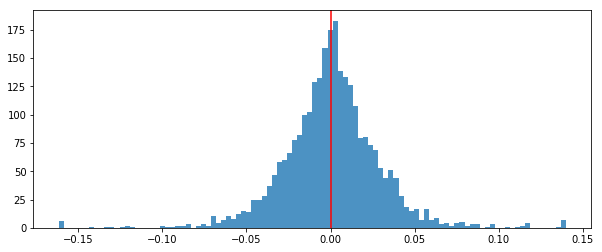

Bin : -0.0561,Frequency = 12
Bin : -0.0531,Frequency = 15
Bin : -0.0501,Frequency = 14
Bin : -0.0470,Frequency = 25
Bin : -0.0440,Frequency = 25
Bin : -0.0410,Frequency = 28
Bin : -0.0380,Frequency = 37
Bin : -0.0350,Frequency = 47
Bin : -0.0320,Frequency = 58
Bin : -0.0289,Frequency = 60
Bin : -0.0259,Frequency = 66
Bin : -0.0229,Frequency = 78
Bin : -0.0199,Frequency = 82
Bin : -0.0169,Frequency = 100
Bin : -0.0139,Frequency = 102
Bin : -0.0108,Frequency = 129
Bin : -0.0078,Frequency = 132
Bin : -0.0048,Frequency = 159
Bin : -0.0018,Frequency = 175
Bin : 0.0012,Frequency = 183
Bin : 0.0042,Frequency = 139
Bin : 0.0073,Frequency = 133
Bin : 0.0103,Frequency = 126
Bin : 0.0133,Frequency = 108
Bin : 0.0163,Frequency = 79
Bin : 0.0193,Frequency = 80
Bin : 0.0223,Frequency = 73
Bin : 0.0254,Frequency = 69
Bin : 0.0284,Frequency = 53
Bin : 0.0314,Frequency = 44
Bin : 0.0344,Frequency = 51
Bin : 0.0374,Frequency = 44
Bin : 0.0405,Frequency = 28
Bin : 0.0435,Frequency = 18
Bin : 0.0465,Frequ

In [162]:
plt.figure(figsize=(10,4))
n,bins,patched = plt.hist(s['Rtn'], bins =100, alpha=0.8)
plt.axvline(s['Rtn'].mean(),color='red')
plt.show()

for index in range(len(n)):
    if n[index]>10 :
        print("Bin : %.4f,Frequency = %d"% (bins[index],n[index]) )
        
print(s['Rtn'].std()*np.sqrt(252))
print(s['Rtn'].mean()*252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015CC6128>,
      dtype=object)

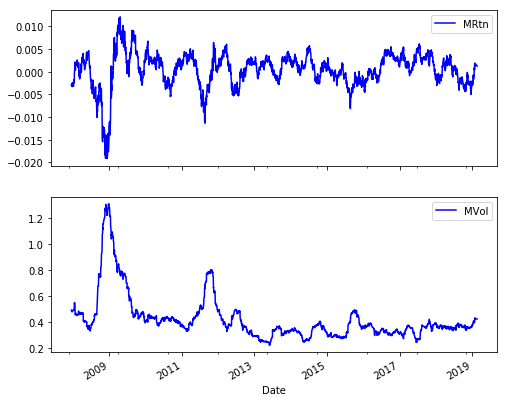

In [171]:
s[['MRtn','MVol']].plot(subplots=True,style='b',figsize=(8,7))


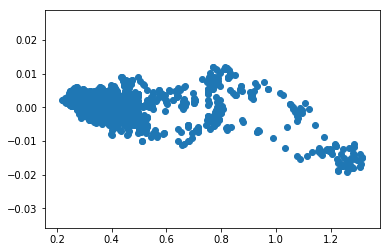

In [169]:
plt.scatter(s['MVol'],s['MRtn'])

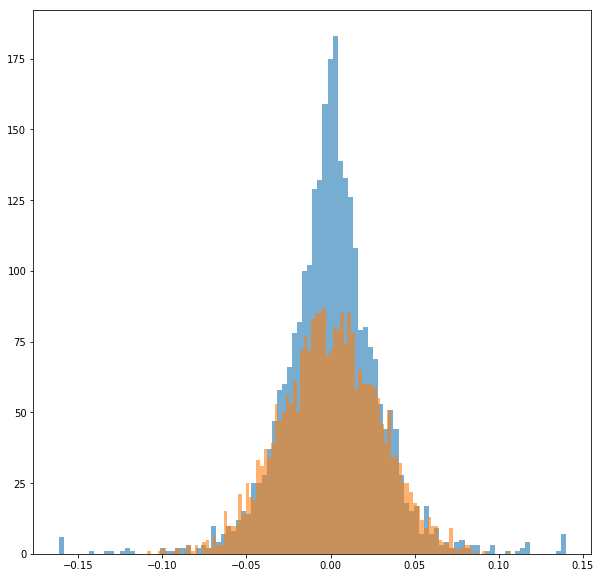

In [170]:
mu = s['Rtn'].mean()
std = s['Rtn'].std()

nordist = np.random.normal(mu,std,len(s))
plt.figure(figsize=(10,10))
_,_,_=plt.hist(s['Rtn'],bins=100,alpha=0.6)
_,_,_=plt.hist(nordist,bins=100,alpha=0.6)
plt.show()